In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/mi-datasets/train.csv
/kaggle/input/mi-datasets/test.csv


In [3]:
train = pd.read_csv("/kaggle/input/mi-datasets/train.csv", index_col = 0)
test = pd.read_csv("/kaggle/input/mi-datasets/test.csv", index_col = 0)

In [4]:
train.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,4463.253268,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,2657.114446,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,4320.802847,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,4502.841233,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,4473.191669,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense
X = train.iloc[:, 2:-1]  # Features
y = train['label']  # Labels

In [6]:
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = keras.Sequential([
           keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
           keras.layers.Dense(64, activation='relu'),
           keras.layers.Dense(len(label_encoder.classes_), activation='softmax')])


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=15, validation_data=(X_val, y_val))

Epoch 1/10
480/480 [==============================] - 9s 4ms/step - loss: 1.1896 - accuracy: 0.5858 - val_loss: 0.9141 - val_accuracy: 0.6937
Epoch 2/10
480/480 [==============================] - 2s 3ms/step - loss: 0.7601 - accuracy: 0.7376 - val_loss: 0.7596 - val_accuracy: 0.7343
Epoch 3/10
480/480 [==============================] - 1s 3ms/step - loss: 0.6122 - accuracy: 0.7920 - val_loss: 0.6656 - val_accuracy: 0.7738
Epoch 4/10
480/480 [==============================] - 2s 3ms/step - loss: 0.5085 - accuracy: 0.8283 - val_loss: 0.6077 - val_accuracy: 0.8054
Epoch 5/10
480/480 [==============================] - 2s 4ms/step - loss: 0.4325 - accuracy: 0.8532 - val_loss: 0.5553 - val_accuracy: 0.8110
Epoch 6/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3725 - accuracy: 0.8721 - val_loss: 0.5347 - val_accuracy: 0.8293
Epoch 7/10
480/480 [==============================] - 2s 3ms/step - loss: 0.3193 - accuracy: 0.8953 - val_loss: 0.5206 - val_accuracy: 0.8360
Epoch 

In [12]:
X_test = test.iloc[:, 1:-1]

In [13]:
scaler= StandardScaler()
X_test = scaler.fit_transform(X_test)

In [14]:
predictions = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [15]:
# Extract the 'id' column from the test data
id_column = test['id']

# Create a DataFrame for the predictions
submission_df = pd.DataFrame({'id': id_column, 'label': predictions.argmax(axis=1)})  # argmax to convert back to numerical labels

In [16]:
print(submission_df)

          id  label
length             
66149   9586      9
66149   6984      4
66149   7047      9
66149   2510      2
66149     34      0
...      ...    ...
66149   4583      4
66149   6045      6
66149   1897      8
66149   3565      3
66149   5685      5

[999 rows x 2 columns]


In [17]:
submission_df.head()  # Display the first few rows

,id,label
length,,
66149,9586,9
66149,6984,4
66149,7047,9
66149,2510,2
66149,34,0


In [18]:
# Extract the 'id' column from the test data
id_column = test['id']

# Create a DataFrame for the predictions
submission_df = pd.DataFrame({'id': id_column, 'label': predictions.argmax(axis=1)})

# Remove the 'length' column from the DataFrame
submission_df = submission_df[['id', 'label']]


In [19]:
print(submission_df)

          id  label
length             
66149   9586      9
66149   6984      4
66149   7047      9
66149   2510      2
66149     34      0
...      ...    ...
66149   4583      4
66149   6045      6
66149   1897      8
66149   3565      3
66149   5685      5

[999 rows x 2 columns]


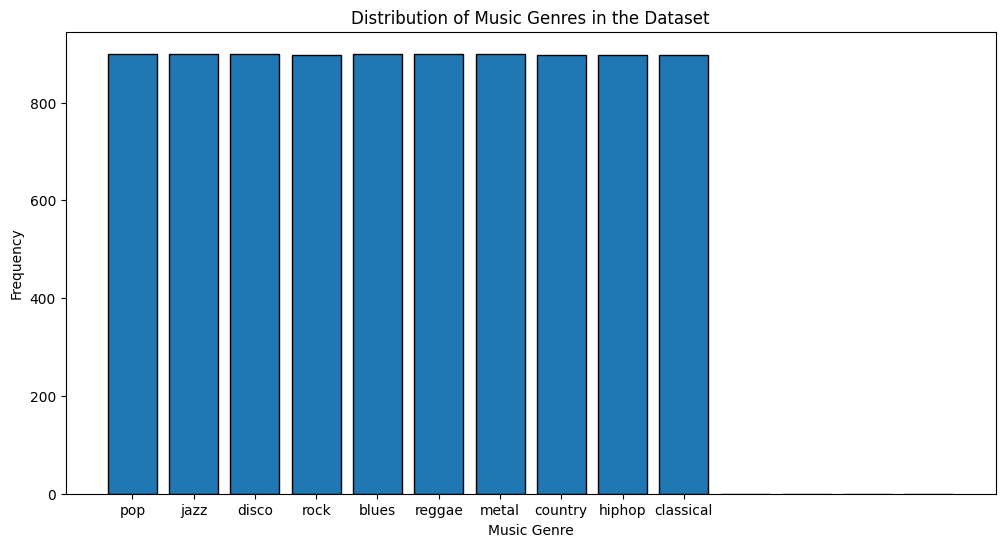

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'label' is the column containing music genre labels
# Adjust the column name to match your dataset

plt.figure(figsize=(12, 6))

# Create a histogram to visualize the distribution of music genres
plt.hist(train['label'], bins=range(15), edgecolor='k', align='left', rwidth=0.8)

# Customize the x-axis labels
plt.xticks(range(10))

# Add labels and a title
plt.xlabel('Music Genre')
plt.ylabel('Frequency')
plt.title('Distribution of Music Genres in the Dataset')

# Show the plot
plt.show()


In [21]:
submission_df.to_csv('submissions.csv', index=False)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras

X = train.iloc[:, 2:-1]  # Features (excluding 'length' column)
y = train['label']  # Labels

scaler = StandardScaler()
X = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20
225/225 [==============================] - 2s 4ms/step - loss: 1.3463 - accuracy: 0.5346 - val_loss: 1.0706 - val_accuracy: 0.6448
Epoch 2/20
225/225 [==============================] - 1s 3ms/step - loss: 0.8461 - accuracy: 0.7093 - val_loss: 0.8212 - val_accuracy: 0.7243
Epoch 3/20
225/225 [==============================] - 1s 4ms/step - loss: 0.6743 - accuracy: 0.7695 - val_loss: 0.7377 - val_accuracy: 0.7610
Epoch 4/20
225/225 [==============================] - 1s 3ms/step - loss: 0.5737 - accuracy: 0.8069 - val_loss: 0.6584 - val_accuracy: 0.7777
Epoch 5/20
225/225 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.8334 - val_loss: 0.6045 - val_accuracy: 0.7971
Epoch 6/20
225/225 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8593 - val_loss: 0.5821 - val_accuracy: 0.8038
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 0.3811 - accuracy: 0.8757 - val_loss: 0.5343 - val_accuracy: 0.8243
Epoch 

In [25]:
X_test = test.iloc[:, 1:-1]
scaler= StandardScaler()
X_test = scaler.fit_transform(X_test)
predictions = model.predict(X_test)
# Extract the 'id' column from the test data
id_column = test['id']

# Create a DataFrame for the predictions
submission_df = pd.DataFrame({'id': id_column, 'label': predictions.argmax(axis=1)})  # argmax to convert back to numerical labels
submission_df = submission_df[['id', 'label']]
submission_df.to_csv('submission.csv', index=False)

32/32 [==============================] - 0s 1ms/step


In [26]:
#92import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

# Load your data
# ...
X = train.iloc[:, 2:-1]  # Features
y = train['label'] 
# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
initial_learning_rate = 0.001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=60, batch_size=12, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Make predictions on the test set
X_test = scaler.transform(X_test)  # Assuming you have X_test data
predictions = model.predict(X_test)
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Create submission DataFrame
submission_df = pd.DataFrame({'id': test['id'], 'label': predicted_labels})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

Epoch 1/60
600/600 [==============================] - 4s 3ms/step - loss: 1.3299 - accuracy: 0.5260 - val_loss: 0.9176 - val_accuracy: 0.6959
Epoch 2/60
600/600 [==============================] - 2s 3ms/step - loss: 0.9813 - accuracy: 0.6596 - val_loss: 0.7840 - val_accuracy: 0.7382
Epoch 3/60
600/600 [==============================] - 2s 3ms/step - loss: 0.8641 - accuracy: 0.6972 - val_loss: 0.7210 - val_accuracy: 0.7437
Epoch 4/60
600/600 [==============================] - 2s 3ms/step - loss: 0.7755 - accuracy: 0.7294 - val_loss: 0.6618 - val_accuracy: 0.7799
Epoch 5/60
600/600 [==============================] - 2s 3ms/step - loss: 0.7309 - accuracy: 0.7501 - val_loss: 0.6239 - val_accuracy: 0.7815
Epoch 6/60
600/600 [==============================] - 2s 3ms/step - loss: 0.6881 - accuracy: 0.7643 - val_loss: 0.5796 - val_accuracy: 0.8071
Epoch 7/60
600/600 [==============================] - 2s 3ms/step - loss: 0.6392 - accuracy: 0.7754 - val_loss: 0.5222 - val_accuracy: 0.8216
Epoch 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np


# Exclude correlated columns
columns_to_exclude = ['spectral_centroid_mean', 'spectral_bandwidth_mean']
X = train.drop(columns=['label'] + columns_to_exclude)  # Exclude target and correlated columns
y = train['label']

# Data preprocessing
scaler = StandardScaler()
X = scaler.fit_transform(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Define a learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 50:
        lr *= 0.5
    return lr

# Build the neural network
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Create an optimizer instance with the custom learning rate
custom_optimizer = Adam(learning_rate=0.001)

# Compile the model with the custom optimizer and sparse categorical crossentropy loss
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_scheduler])

# Evaluation on Validation Set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")


columns_to_exclude = ['spectral_centroid_mean', 'rolloff_mean']
X_test = test.drop(columns=columns_to_exclude)


#X_test = test.iloc[:, 1:-1]
#X_test = scaler.transform(X_test)  
X_test_scaled = scaler.fit_transform(X_test)
# Create a DataFrame with the scaled test data and correct columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
#X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Make predictions using the model
predictions = model.predict(X_test_scaled_df)

# Convert predictions back to original labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Create submission DataFrame
submission_df = pd.DataFrame({'id': test['id'], 'label': predicted_labels})

# Save the submission file
submission_df.to_csv('submission_corr.csv', index=False)

Epoch 1/50
253/253 [==============================] - 2s 4ms/step - loss: 1.4308 - accuracy: 0.4899 - val_loss: 0.9922 - val_accuracy: 0.6589 - lr: 0.0010
Epoch 2/50
253/253 [==============================] - 1s 3ms/step - loss: 1.0319 - accuracy: 0.6408 - val_loss: 0.8290 - val_accuracy: 0.7233 - lr: 0.0010
Epoch 3/50
253/253 [==============================] - 1s 3ms/step - loss: 0.8631 - accuracy: 0.6981 - val_loss: 0.6982 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 4/50
253/253 [==============================] - 1s 3ms/step - loss: 0.7804 - accuracy: 0.7386 - val_loss: 0.6116 - val_accuracy: 0.7956 - lr: 0.0010
Epoch 5/50
253/253 [==============================] - 1s 3ms/step - loss: 0.7053 - accuracy: 0.7550 - val_loss: 0.5731 - val_accuracy: 0.8122 - lr: 0.0010
Epoch 6/50
253/253 [==============================] - 1s 3ms/step - loss: 0.6446 - accuracy: 0.7801 - val_loss: 0.5210 - val_accuracy: 0.8200 - lr: 0.0010
Epoch 7/50
253/253 [==============================] - 1s 3ms/step - lo

AttributeError: 'numpy.ndarray' object has no attribute 'columns'